In [1]:
# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para obter dados financeiros
import yfinance as yf

# Bibliotecas para modelos de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Bibliotecas para modelos de Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# Biblioteca para modelos de séries temporais
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Biblioteca para ignorar avisos
import warnings
warnings.filterwarnings("ignore")


2024-09-29 18:10:51.827543: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 18:10:51.828059: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-29 18:10:51.830155: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-29 18:10:51.836433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 18:10:51.846999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Definir o ticker do Bitcoin
btc = yf.Ticker("BTC-USD")

# Obter dados históricos (desde 2014)
data = btc.history(start="2014-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))

# Visualizar as primeiras linhas
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [3]:
# Resumo estatístico
data['Close'].describe()


count     3665.000000
mean     17958.809922
std      19757.089793
min        178.102997
25%       1169.280029
50%       9182.577148
75%      29283.103516
max      73083.500000
Name: Close, dtype: float64

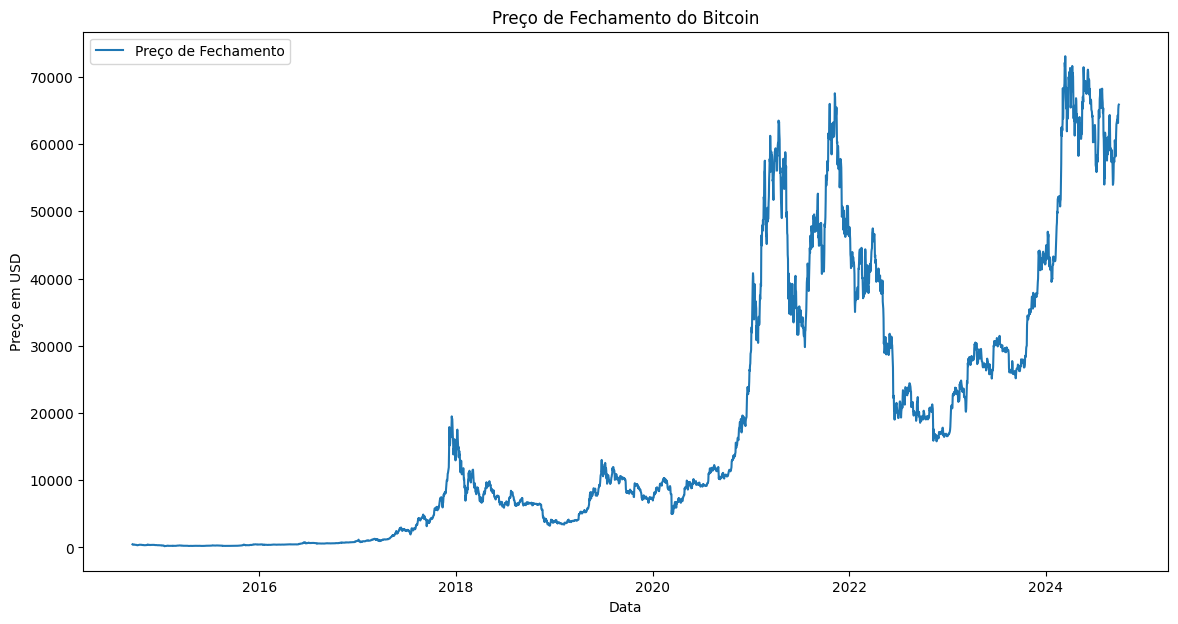

In [4]:
# Plotar o preço de fechamento
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Preço de Fechamento')
plt.title('Preço de Fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço em USD')
plt.legend()
plt.show()
